In [ ]:
# chapter 3

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Zスコア：平均から標準偏差何個ぶん離れているかを表している
# Zスコアの求め方 = (データ - 平均) ÷ (標準偏差)

In [5]:
# 平均μ=76、標準偏差=7.2
test = np.array([52, 74, 98])

In [6]:
(test - 76) / 7.2

array([-3.33333333, -0.27777778,  3.05555556])

In [10]:
# 物理：平均 87 点、標準偏差 6.4 点
# 数学：平均 74 点、標準偏差 3.2 点
# 点数　物理 92 点、数学 82 点

In [13]:
(92 - 87) / 6.4

0.78125

In [12]:
(82 - 74) / 3.2

2.5

In [19]:
# chapter 4

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# 連続する確率分布をグラフ化したものを密度曲線
# XとYの値が重要ではなく密度曲線内の面積に意味がある　=> 面積、積分、確率
# 密度曲線内の面積を和は「1」（つまり100%）

In [22]:
coffee = np.array([0.4, 0.8, 1.2, 2.2, 2.3, 2.3, 3.0, 3.0, 3.0, 3.1, 3.3, 3.5, 3.8, 4.1, 4.8, 4.9, 5.1, 5.7, 6.9, 7.1])

In [23]:
coffee.shape, coffee.size, coffee.mean(), np.median(coffee), coffee.var(), coffee.std()

((20,), 20, 3.525, 3.2, 3.1858750000000002, 1.7849019580918164)

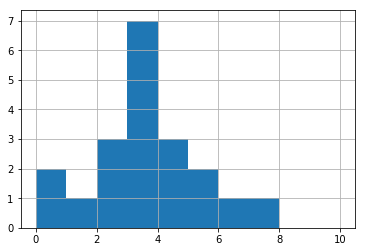

In [24]:
plt.hist(coffee, range=[0, 10])
plt.grid(True)
plt.show()

(array([10.,  5., 15., 35., 15., 10.,  5.,  5.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

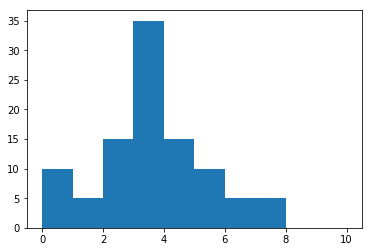

In [29]:
# 相対度数でヒストグラムを作成
# zeros_like：同じ形状の配列を0で初期化
# 各要素の値を 1 にして、各要素（一日あたりのコーヒー杯数）を全体の割合で表示
plt.hist(coffee, weights=np.zeros_like(coffee) + 1 / coffee.size * 100, range=[0, 10])
# plt.show()

In [30]:
# np.random.normal　正規分布：平均 5.0、標準偏差 1.0 で 1,000 個
coffee2 = np.random.normal(5.0, 1.0, 1000)

In [31]:
coffee2.mean(), coffee2.std()

(4.989519846481397, 1.0133993163948534)

In [32]:
coffee2.size

1000

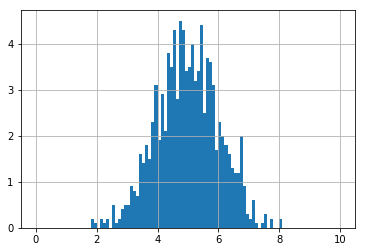

In [44]:
plt.hist(coffee2, weights=np.zeros_like(coffee2) + 1 / coffee2.size * 100, range=[0, 10], bins=100)
plt.grid(True)
plt.show()

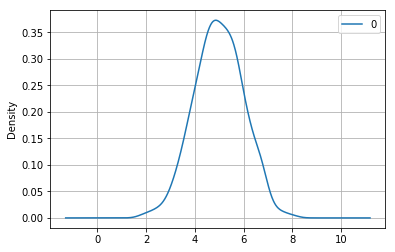

In [41]:
# 密度曲線(Density Curve)
pd.DataFrame(coffee2).plot(kind='density')
plt.grid(True)
plt.show()

In [45]:
# chapter 5

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 正規分布は英語でNormal Distribution（ノーマル・ディストリビューション）
# 平均(Mean)付近が一番高く左右対称の釣り鐘型の分布
# 「68(σ)-95(2σ)-99.7(3σ)ルール」と標準偏差を用いて確率を導出
# ZスコアとZテーブル（標準正規分布表）でも確率も導き出すことが可能

In [3]:
# np.random.normal　正規分布：平均 176.0、標準偏差 5.1 で 1,000 個
height = np.random.normal(176.0, 5.1, 1000)

In [4]:
height.mean(), height.std()

(176.03165145442676, 5.2531334516994495)

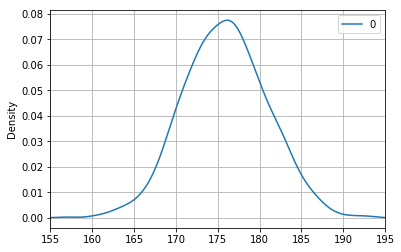

In [52]:
pd.DataFrame(height).plot(kind='density')
plt.grid(True)
plt.xlim([155.0, 195.0])
plt.show()

In [57]:
# 178.6cm より低い人の割合
# Zスコアを求め、Zテーブルより確率を取得（縦：小数点１位、横：小数点２位）
a_zccore = (178.6 - 176.0) / 5.1

In [58]:
a_zccore

0.5098039215686264

In [5]:
# chapter 6

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 相関関係には「正」と「負」、「強い」と「弱い」といった相関関係がある。
# 「正の相関関係」は一方の変数が増えた時、他方の変数も増える関係性。
# 「負の相関関係」は逆に一方の変数が増えた時に、他方が減る関係性。

# 散布図から正・負の相関関係を読み取る
# 散布図から強い・弱い相関関係を読み取る

In [17]:
# 例：勉強時間とテストの点数
time = np.array([0.5, 6, 2, 1.5, 4, 2.5, 3, 1, 5, 5.5, 3.5, 4.5, 3.5, 3])
score = np.array([69, 97, 83, 76, 92, 86, 87, 74, 93, 93, 88, 89, 84, 79])

In [18]:
time.size, time.mean(), time.std()

(14, 3.25, 1.6007810593582121)

In [19]:
score.size, score.mean(), score.std()

(14, 85.0, 7.791937224739796)

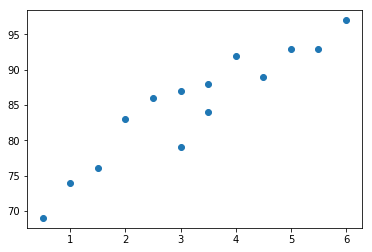

In [20]:
plt.scatter(time, score)
plt.show()

In [21]:
# chapter 7

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 相関関係をより具体的に数値化したものが「相関係数」

#  ・相関係数は英語でcorrelation coefficient（コリレーション・コエフィシェント）
#  ・一般的に英語記号で「r」（アール）と表記
#  ・相関係数は-1 <= r <= 1の値を持つ

In [3]:
x = np.array([1, 3, 4, 6])
y = np.array([1, 2, 5, 8])

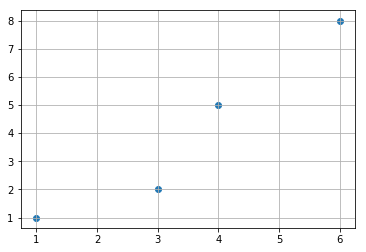

In [5]:
plt.scatter(x, y)
plt.grid(True)
plt.show()

In [38]:
x.mean(), x.std(), y.mean(), y.std()

(3.5, 1.8027756377319946, 4.0, 2.7386127875258306)

In [39]:
# 相関係数：X と Yの共分散 / Xの標準偏差 * Yの標準偏差
# 共分散：Xの偏差 * Yの偏差の平均の総和の平均（総和 / 総数）

In [15]:
# 共分散 bias=True を指定しないと不偏分散
np.cov(x, y), np.cov(x, y, bias=True)

(array([[ 4.33333333,  6.33333333],
        [ 6.33333333, 10.        ]]), array([[3.25, 4.75],
        [4.75, 7.5 ]]))

In [17]:
# ddofの値を増やすことで偏差の積を割る値を減らす。
# 不偏分散を求める場合はddof=1、標本分散を求める場合はddof=0にして全体のサンプル数から引く値を指定
np.cov(x, y, ddof=0)[0][1], np.cov(x, y, ddof=0)[1][0],np.cov(x, y, ddof=0)[0][0], np.cov(x, y, ddof=0)[1][1]

(4.75, 4.75, 3.25, 7.5)

In [7]:
# 相関係数
np.corrcoef(x, y)

array([[1.       , 0.9621024],
       [0.9621024, 1.       ]])

In [10]:
np.cov(x, y, ddof=0)[0][1] / (x.std() * y.std())

0.9621023987294833

In [1]:
# chapter 8

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 線形回帰：統計学の回帰分析の一種。
# 回帰分析：ある変数xが与えられた時、それと相関関係のあるyの値を説明・予測する。

# ・線形回帰は英語で「Linear Regression」（リニアー・レグレッション）
# ・線形モデルから変数xにおけるyの値の推測が可能

In [4]:
# 例：勉強時間とテストの点数
time = np.array([0.5, 6, 2, 1.5, 4, 2.5, 3, 1, 5, 5.5, 3.5, 4.5, 3.5, 3])
score = np.array([69, 97, 83, 76, 92, 86, 87, 74, 93, 93, 88, 89, 84, 79])

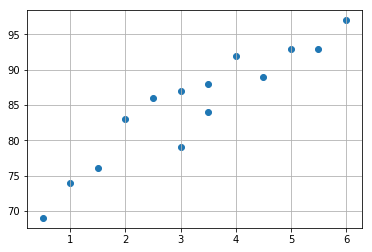

In [7]:
plt.scatter(time, score)
plt.grid(True)
plt.show()

In [8]:
# chapter 9

In [9]:
%matplotlib inline

import numpy as np
import pandas as pb
import matplotlib.pyplot as plt

In [10]:
#  ・残差は英語で「Residual」（レジヂュアル）
#  ・実際のデータと線形モデルで推測した値との差が残差
#  ・実データが予測値よりも低い場合は残差がマイナス
#  ・実データが予測値よりも高い場合は残差がプラス
#  ・線形モデル（データに最もフィットする直線）を求める方法は2つ
#  ・①残差の絶対値の合計が最小になる
#  ・②残差の二乗の合計が最小になる
#  ・2つ目の残差の二乗の最小値を用いて線形モデルを導き出す方法が「最小二乗法」
#  ・「最小二乗法」は英語でLeast Squares Method（LSM）

In [11]:
# test

In [12]:
(92 - 83) / 3.0

3.0

In [13]:
0.41 * 22.4 -0.55

8.633999999999999